# 모두를 위한 딥러닝 : Pytorch
## Lecture 6 - Softmax Classification
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.

### BackGround
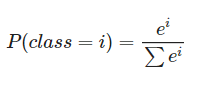  
함수 이름에서도 알 수 있다시피, max값을 soft하게 바꿔주어 확률값으로 표현한다. 

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [41]:
torch.manual_seed(1)

### SoftMax

In [42]:
z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


### Cross Entropy Loss(Low - Level)
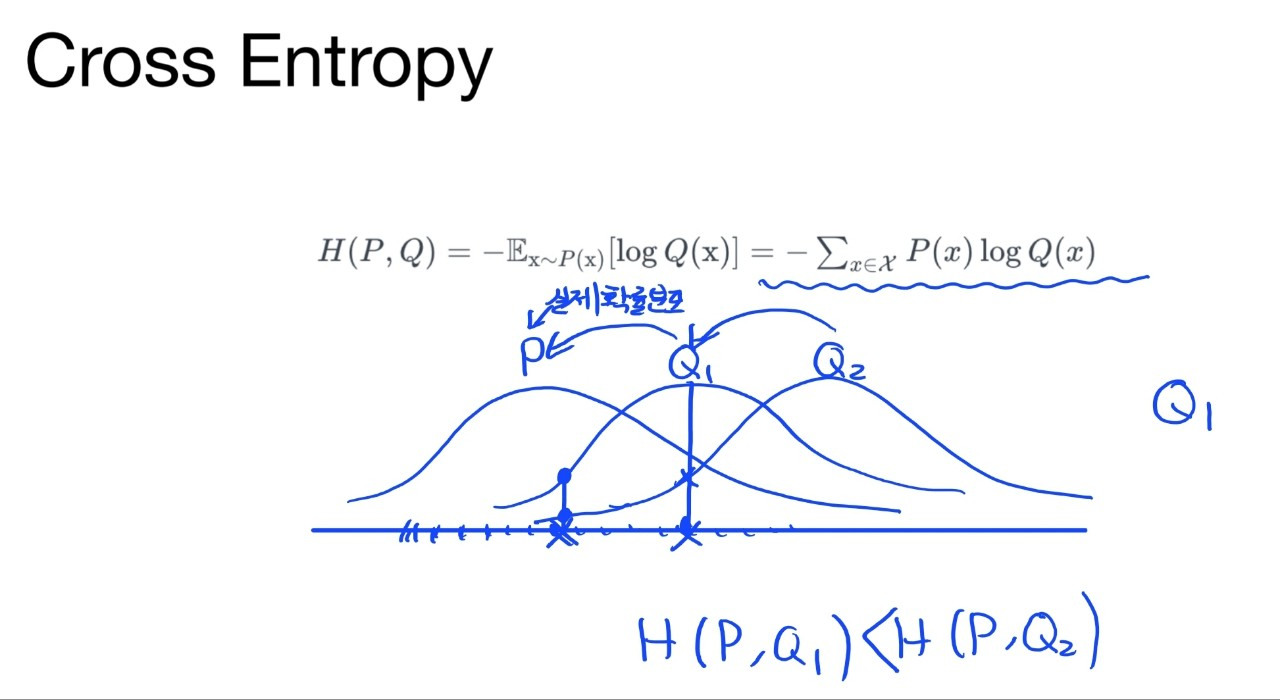
위의 그림에서 처럼, 실제 확률 분포와 가까워질수록 cost 값이 줄어들게 된다.

In [43]:
z = torch.rand(3,5, requires_grad = True)
print(z)
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)
tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [44]:
y = torch.randint(5, (3,)).long()
print (y)

tensor([0, 2, 1])


In [45]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1,y.unsqueeze(dim=1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

scatter(차원,인덱스 위치,바꿀 값 )

In [46]:
cost = torch.mean(-(y_one_hot*torch.log(hypothesis))) 

In [47]:
print(cost)

tensor(0.2938, grad_fn=<MeanBackward0>)


### CrossEntropyLoss with nn.functional

In [48]:
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [52]:
cost = torch.mean(torch.sum(-y_one_hot*F.log_softmax(z,dim=1),dim=1),dim=0)

In [53]:
cost

tensor(1.4689, grad_fn=<MeanBackward1>)

In [65]:
F.nll_loss(F.log_softmax(z,dim=1),y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [66]:
F.cross_entropy(z,y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

### Training with Low-Level Cross Entropy Loss

In [67]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [68]:
# 모델 초기화
W = torch.zeros((4,3),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

optimizer = optim.SGD([W, b], lr = 0.1)

for epoch in range(1,1001):

    hypothesis = F.softmax(x_train.matmul(W)+b, dim=1)

    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1,y_train.unsqueeze(dim=1),1)

    cost = torch.mean(torch.sum(-y_one_hot*torch.log(hypothesis),dim=1),dim=0)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 1000, cost.item()
        ))

Epoch  100/1000 Cost: 0.714269
Epoch  200/1000 Cost: 0.638430
Epoch  300/1000 Cost: 0.591185
Epoch  400/1000 Cost: 0.554105
Epoch  500/1000 Cost: 0.522028
Epoch  600/1000 Cost: 0.492791
Epoch  700/1000 Cost: 0.465232
Epoch  800/1000 Cost: 0.438588
Epoch  900/1000 Cost: 0.412274
Epoch 1000/1000 Cost: 0.385798


### Training with F.cross_entropy

In [69]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (2)
    z = x_train.matmul(W) + b # or .mm or @
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### High Implementation with nn.Module

In [ ]:
from turtle import forward


class Softmax(nn.Module):
    def __init__(self, x: torch.tensor) -> None:
        super().__init__()
        self.x = x
        self.input_dim = self.x.shape[1]
        self.output_dim = 3
        self.linear = nn.Linear(self.input_dim, self.output_dim)

    def forward(self) -> torch.tensor:
        return self.linear(self.x)

In [ ]:
model = Softmax(x_train)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model()

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 4.661125
Epoch  100/1000 Cost: 0.711834
Epoch  200/1000 Cost: 0.630354
Epoch  300/1000 Cost: 0.573769
Epoch  400/1000 Cost: 0.523962
Epoch  500/1000 Cost: 0.476842
Epoch  600/1000 Cost: 0.430889
Epoch  700/1000 Cost: 0.385375
Epoch  800/1000 Cost: 0.339987
Epoch  900/1000 Cost: 0.295070
Epoch 1000/1000 Cost: 0.254579
